# Data Cleansing
### Data Source
Stroke Prediction Dataset. (2021, January 26). Kaggle. 

Retrieved from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?rvi=1  

In This Notebook:
- Data Profiling
- Data Quality: Missings
- Data Quality: Duplicate
- Data Quality: Inconsistencies
- Data Quality: Formats


Folders:
- Original Data set: data/original
- Cleaned Data set:  data/cleaned
- profiling htmls: output/ 


Results of the analysys:<br>
Data Structure:<br>
In this specific case data structure is already in an useful format for our purpose, for this reason we dont proceed to any reshaping of the data.There are no non-atomicity issues<br>
Regarding Data Quality and Cleansing, the data has good data quality level, but still we needed checks and performed some cleansing.We performed a data profiling (see stroke_prediction_profiling.html) to identify data quality issues visually, the proper exploration data analysis will be performed on the cleaned data set.<br>
#### irrelevant Fields
ID has no predictive power we remove it from the dataser
#### Duplicates
No duplicates identified
#### Missings
- BMI has some explicit missings and we did not find any correlation so they seems to miss at random.so we decided to ad an extra field BMI_IMP with the imputed mean and will decide tduring the modelling if using such imputation.

- Smoking Status has some explicit missings (value = 'Unknown') and we did not find any correlation so they seems to miss at random. so we decided to ad an extra field SMOKING_STATUS_IMP with the imputed modus and will decide during the modelling if using such imputation.
#### Categories
There are no inconsistent Categories, but would have been useful to have more granular categories for example for work_type, smoking_status(x.ex.:years no smoker)
#### Outliars
there are some possible outliars, but they. are plausible values so we leave to modelling phase to decide how to handle such values
#### Accuracy
For the Value Age the most value are float , but integer-like (without decimal), but some has decimal (ex. 1.38). Added an extra column ROUNDED_AGE and will decide during modeling if use it 


### Metadata from Kaggle
Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

## Install Packages and Imports
skip this step if already installed

In [2]:
!pip install pandas
!pip install ydata-profiling
!pip install missingno

In [17]:
import pandas as pd
from ydata_profiling import ProfileReport
import missingno as msno
%matplotlib inline


## Read the Data

In [53]:

df = pd.read_csv("../data/original/healthcare-dataset-stroke-data.csv",low_memory = False)


## Profiling

In [9]:
df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

### Using a Profiling PAckage to generate an HTML profiling files

In [12]:
profile = ProfileReport(df, title='Stroke Prediction Original Data')
profile.to_file(output_file='../output/stroke_prediction_profiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Structure & Reshaping
The structure of the data is already suitable for our analysis<br>
The ID fields has no predictive power so we remove it from dataset

In [ ]:
### Alerts from profiling

age is highly overall correlated with ever_married	High correlation
ever_married is highly overall correlated with age and 1 other fields	High correlation
work_type is highly overall correlated with ever_married	High correlation
hypertension is highly imbalanced (53.9%)	Imbalance
heart_disease is highly imbalanced (69.7%)	Imbalance
stroke is highly imbalanced (71.9%)	Imbalance
bmi has 201 (3.9%) missing values	Missing

In [55]:
df.drop(columns=['id'], inplace=True)


## Missings
From Profiling:
- BMI has missing so we make an additional field with the imputed mean
- Smoking Status has "Unknown" as value that could be considered as Missing therefore we make an additional field with the imputed mean

<AxesSubplot: >

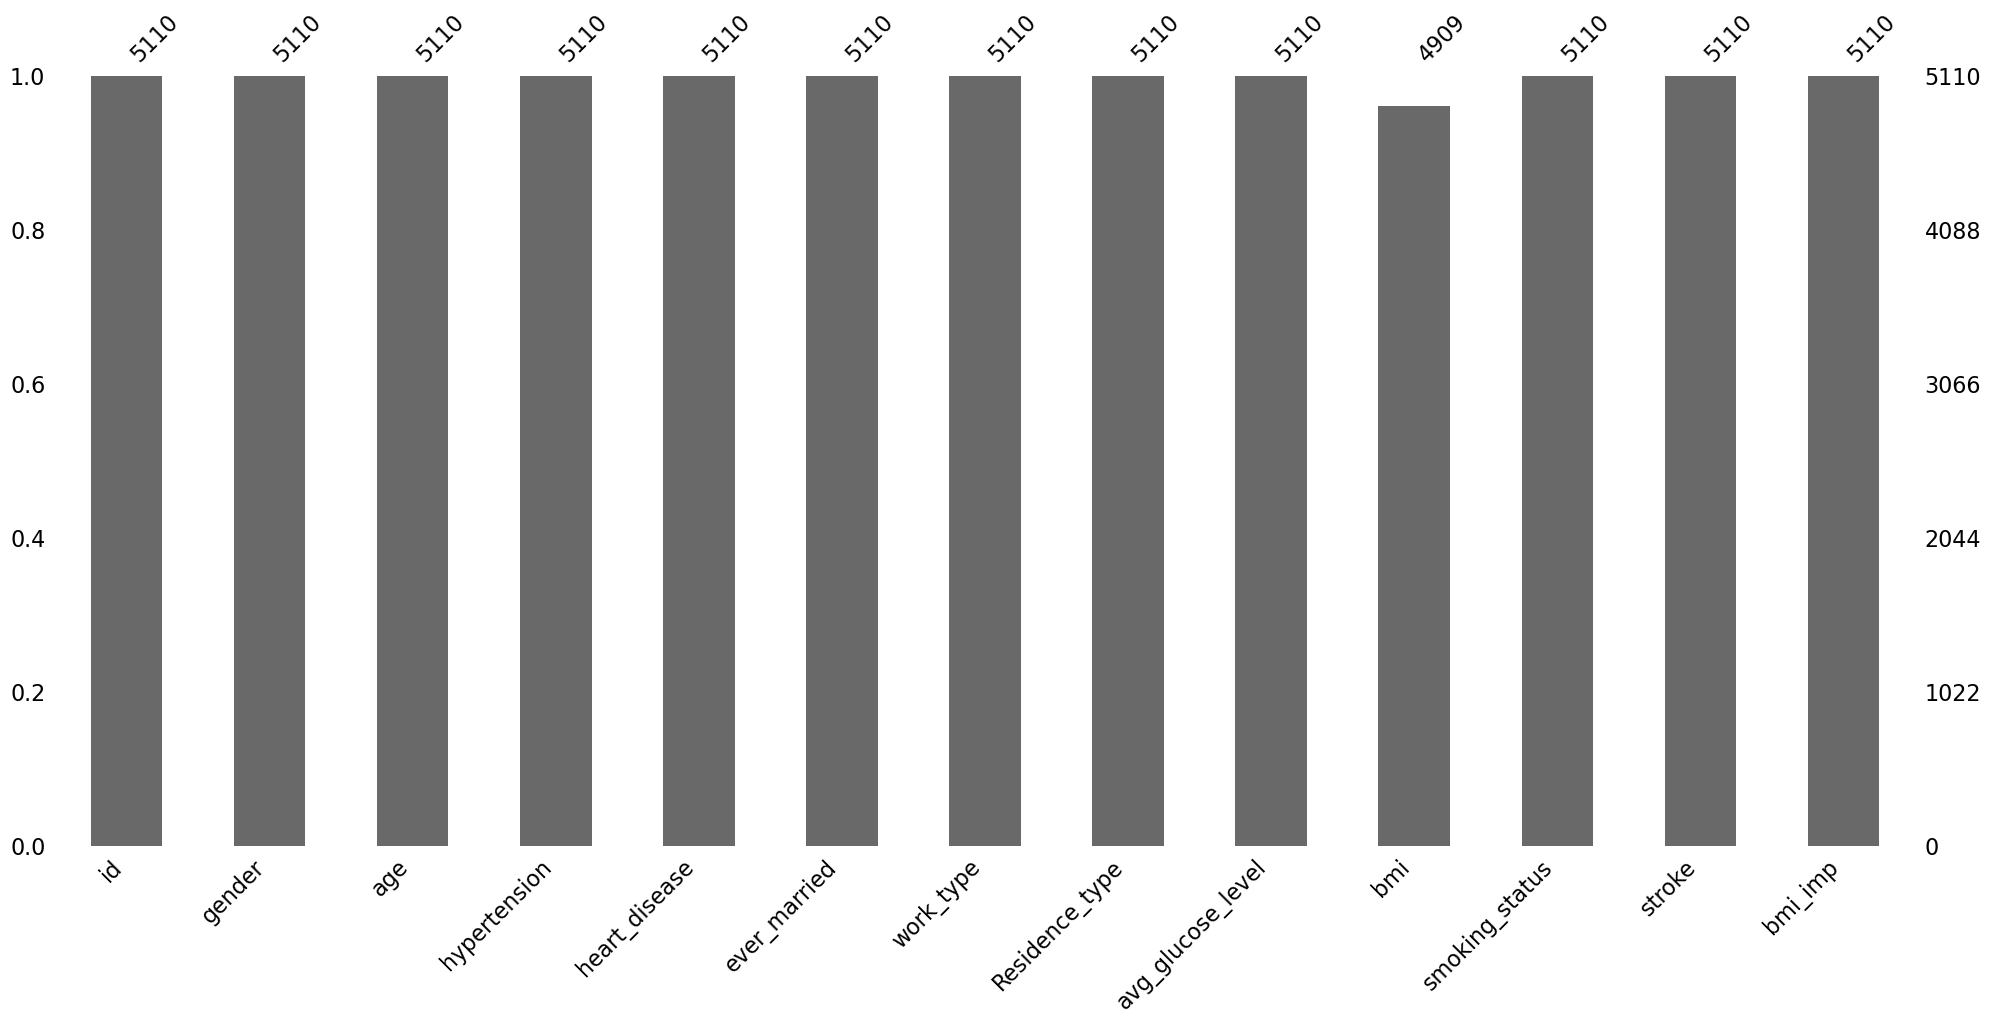

In [18]:
msno.bar(df)


### bmi

In [36]:
df[df['bmi'].isnull()].head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_imp,rounded_age,smoking_imp
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,28.893237,61.0,never smoked
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,28.893237,59.0,Unknown
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,28.893237,78.0,Unknown
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,28.893237,57.0,Unknown
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,28.893237,58.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,18861,Male,32.0,0,0,No,Private,Rural,95.58,NaN,smokes,0,28.893237,32.0,smokes
1816,9170,Male,60.0,0,0,Yes,Self-employed,Urban,185.71,NaN,Unknown,0,28.893237,60.0,Unknown
1836,1818,Female,30.0,0,0,No,Govt_job,Urban,88.20,NaN,smokes,0,28.893237,30.0,smokes
1837,5478,Female,60.0,0,0,Yes,Self-employed,Urban,203.04,NaN,smokes,0,28.893237,60.0,smokes


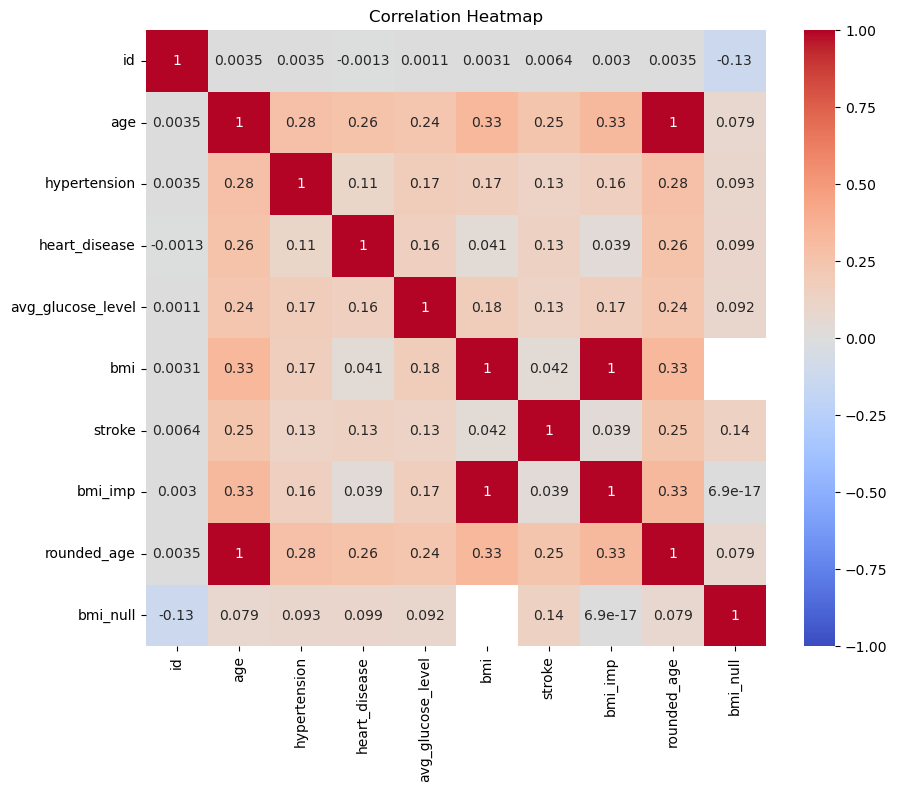

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df['bmi_null'] = df['bmi'].isnull()
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



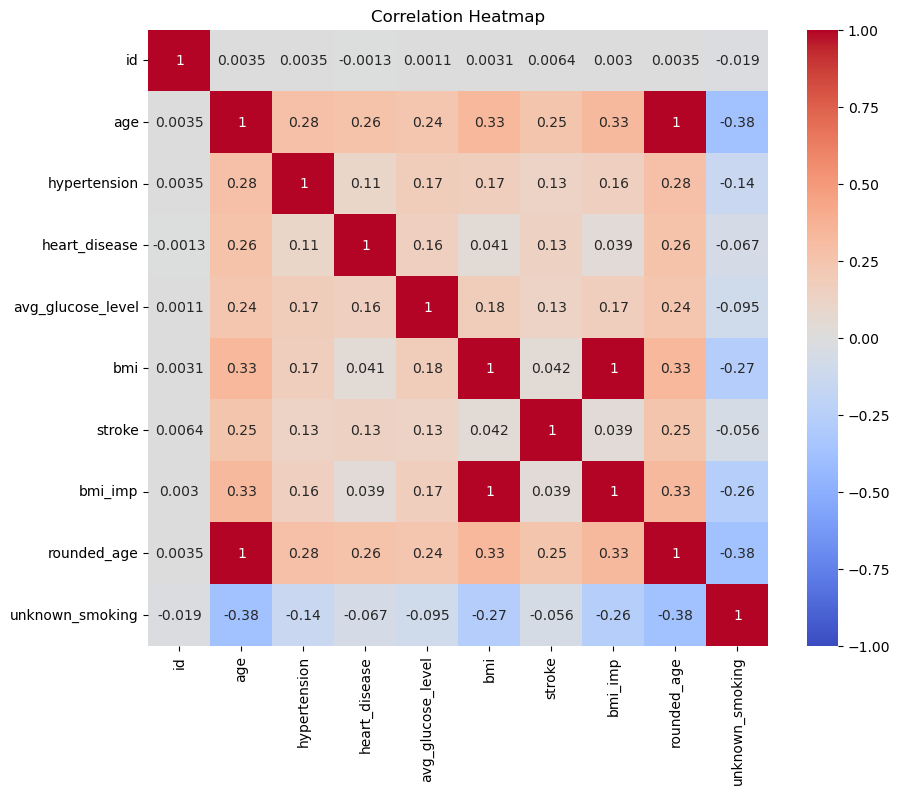

In [40]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df['unknown_smoking'] = (df['smoking_status'] == 'Unknown').astype(int)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [56]:
median_bmi = df['bmi'].median()
median_bmi


28.1

In [57]:
df['bmi_imp'] = df['bmi'].fillna(median_bmi)

### Smoking: Unknown as a Misssing
Also creates a smoking imputation


In [58]:
df.groupby('smoking_status').size().reset_index(name='count')


,smoking_status,count
0,Unknown,1544
1,formerly smoked,885
2,never smoked,1892
3,smokes,789


In [59]:
mode_smoking = df['smoking_status'].mode()[0]

mode_smoking

'never smoked'

In [60]:
df['smoking_status_imp'] = df['smoking_status'].fillna(mode_smoking)

## Integrity

### Looking for duplicates

In [61]:
df.duplicated().sum()

0

In [24]:
df.duplicated(subset=df.columns.difference(['id'])).sum()

0

### Categorical Consistencies
work_type children are indeed minor but the age 

In [25]:
df[df['work_type'] == 'children']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_imp
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1,28.893237
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1,30.900000
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0,18.000000
282,33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0,16.000000
290,55680,Male,13.00,0,0,No,children,Urban,114.84,18.3,Unknown,0,18.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0,16.800000
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0,24.300000
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0,17.400000
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0,17.500000


In [27]:
df[df['work_type'] == 'children'].groupby(['age', 'ever_married']).size().reset_index(name='count')

,age,ever_married,count
0,0.08,No,2
1,0.16,No,3
2,0.24,No,5
3,0.32,No,5
4,0.40,No,2
5,0.48,No,3
6,0.56,No,5
7,0.64,No,4
8,0.72,No,5
9,0.80,No,4


### Age Rounding

In [62]:
df['rounded_age'] = df['age'].astype(int)  # Convert to integer
df['rounded_age'] = df['rounded_age'].astype(float)  # Convert back to float (optional, to keep consistency)
df['rounded_age'] = df['rounded_age'].round() 

### Outliars

<AxesSubplot: >

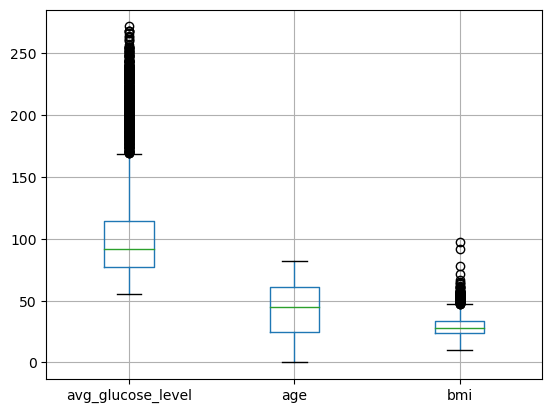

In [52]:
df[['avg_glucose_level', 'age', 'bmi']].boxplot()




### Profiling the Cleaned Dataset

In [63]:
profile = ProfileReport(df, title='Stroke Prediction CLEANED Data')
profile.to_file(output_file='../output/stroke_prediction_CLEANED_profiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Persisting Data

In [64]:
df.to_csv('../data/cleaned/stroke_data_cleaned.csv')